In [1]:
# Imports 
import pandas as pd
import numpy as np

## Data Imports

In [2]:
# Create dataframes
DATA_PATH = '../data/'
potholes = pd.read_csv(DATA_PATH+'Pothole Requests after 10.15.18.csv')
weather = pd.read_csv(DATA_PATH+'NOAA KC Weather Data.csv')

In [3]:
# Change output viewing options
pd.set_option('display.max_columns', 50)

# Look at potholes data
potholes.head()

CASE ID SOURCE    DEPARTMENT  \
0  2019169222  PHONE  Public Works   
1  2019126105  PHONE  Public Works   
2  2019126468    WEB  Public Works   
3  2019183619  PHONE  Public Works   
4  2019190590  PHONE  Public Works   

                                   WORK GROUP  \
0  Public Works-Street and Traffic-District 3   
1  Public Works-Street and Traffic-District 3   
2  Public Works-Street and Traffic-District 3   
3  Public Works-Street and Traffic-District 1   
4  Public Works-Street and Traffic-District 3   

                                     REQUEST TYPE  \
0  Streets / Roadways / Alleys-Pothole-District 3   
1  Streets / Roadways / Alleys-Pothole-District 3   
2  Streets / Roadways / Alleys-Pothole-District 3   
3  Streets / Roadways / Alleys-Pothole-District 1   
4  Streets / Roadways / Alleys-Pothole-District 3   

                      CATEGORY     TYPE      DETAIL CREATION DATE  \
0  Streets / Roadways / Alleys  Pothole  District 3    09/20/2019   
1  Streets / Roadways / Alleys  Pothole  District 3    07/03/2019   
2  Streets / Roadways / Alleys  Pothole  District 3    07/03/2019   
3  Streets / Roadways / Alleys  Pothole  District 1    10/23/2019   
4  Streets / Roadways / Alleys  Pothole  District 3    11/08/2019   

  CREATION TIME  CREATION MONTH  CREATION YEAR STATUS EXCEEDED EST TIMEFRAME  \
0      01:31 PM               9           2019  RESOL                      Y   
1      08:30 AM               7           2019  RESOL                      Y   
2      01:53 PM               7           2019  RESOL                      Y   
3      09:36 AM              10           2019  RESOL                      Y   
4      10:27 AM              11           2019  RESOL                      Y   

  CLOSED DATE  CLOSED MONTH  CLOSED YEAR  DAYS TO CLOSE  \
0  11/07/2019          11.0       2019.0           48.0   
1  10/24/2019          10.0       2019.0          113.0   
2  10/24/2019          10.0       2019.0          113.0   
3  11/22/2019          11.0       2019.0           30.0   
4  11/18/2019          11.0       2019.0           10.0   

               STREET ADDRESS  \
0             13110 E 57th St   
1             1420 E 75th Ter   
2           5500 Michigan Ave   
3  6344 NE Pleasant Valley Rd   
4        9500 Blue Ridge Blvd   

                                ADDRESS WITH GEOCODE  ZIP CODE  \
0      13110 E 57th St64133\n(39.018605, -94.426046)     64133   
1      1420 E 75th Ter64131\n(38.990601, -94.570141)     64131   
2    5500 Michigan Ave64130\n(39.026622, -94.563667)     64130   
3  6344 NE Pleasant Valley Rd64119\n(39.216929, -...     64119   
4  9500 Blue Ridge Blvd64134\n(38.952042, -94.508...     64134   

     NEIGHBORHOOD   COUNTY  COUNCIL DISTRICT POLICE DISTRICT  PARCEL ID NO  \
0  Blue Vue Hills  Jackson                 5            East         63787   
1    East Meyer 6  Jackson                 5           Metro        115894   
2      Blue Hills  Jackson                 5           Metro        147750   
3     Shoal Creek     Clay                 1     Shoal Creek         89139   
4        Fairlane  Jackson                 5           South         56861   

    LATITUDE  LONGITUDE                                           CASE URL  \
0  39.018605 -94.426046  http://city.kcmo.org/kc/ActionCenterRequest/Ca...   
1  38.990601 -94.570141  http://city.kcmo.org/kc/ActionCenterRequest/Ca...   
2  39.026622 -94.563667  http://city.kcmo.org/kc/ActionCenterRequest/Ca...   
3  39.216929 -94.504961  http://city.kcmo.org/kc/ActionCenterRequest/Ca...   
4  38.952042 -94.508463  http://city.kcmo.org/kc/ActionCenterRequest/Ca...   

   30-60-90 Days Open Window  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

In [369]:
potholes.loc[[4812]]

CASE ID SOURCE    DEPARTMENT  \
4812  2019033127  PHONE  Public Works   

                                      WORK GROUP  \
4812  Public Works-Street and Traffic-District 3   

                                        REQUEST TYPE  \
4812  Streets / Roadways / Alleys-Pothole-District 3   

                         CATEGORY     TYPE      DETAIL CREATION DATE  \
4812  Streets / Roadways / Alleys  Pothole  District 3    2019-02-13   

     CREATION TIME  CREATION MONTH  CREATION YEAR STATUS  \
4812      04:35 PM               2           2019  RESOL   

     EXCEEDED EST TIMEFRAME CLOSED DATE  CLOSED MONTH  CLOSED YEAR  \
4812                      Y  2019-02-15           2.0       2019.0   

      DAYS TO CLOSE STREET ADDRESS  \
4812            2.0  400 W 67th St   

                             ADDRESS WITH GEOCODE  ZIP CODE   NEIGHBORHOOD  \
4812  400 W 67th St64113\n(39.007816, -94.593753)     64113  Armour Fields   

       COUNTY  COUNCIL DISTRICT POLICE DISTRICT  PARCEL ID NO   LATITUDE  \
4812  Jackson                 6           Metro        109336  39.007816   

      LONGITUDE                                           CASE URL  \
4812 -94.593753  http://city.kcmo.org/kc/ActionCenterRequest/Ca...   

      30-60-90 Days Open Window  OPEN CASES  
4812                        NaN         924

In [4]:
# Convert CREATION DATE & CLOSED DATE to datetime 
# to prepare for column addition and split
potholes['CREATION DATE'] = pd.to_datetime(potholes['CREATION DATE'])
potholes['CLOSED DATE'] = pd.to_datetime(potholes['CLOSED DATE'])

# Add column indicating total number of open potholes at time of report
a = []
for date in potholes['CREATION DATE']:
    a.append(((potholes['CREATION DATE'] <= date) & (potholes['CLOSED DATE'] > date)).sum())
potholes['OPEN CASES'] = a 

In [5]:
# Look at weather data
weather.head()

STATION        DATE  PRCP  TAVG  TMAX  TMIN
0  USW00013988  2018-10-01  0.00   NaN    81    65
1  USW00013988  2018-10-02  0.00   NaN    89    61
2  USW00013988  2018-10-03  0.00   NaN    91    69
3  USW00013988  2018-10-04  0.00   NaN    69    52
4  USW00013988  2018-10-05  0.07   NaN    84    56

In [6]:
# Look at null values
weather[weather.PRCP.isna()]

STATION        DATE  PRCP  TAVG  TMAX  TMIN
11   USW00013988  2018-10-12   NaN   NaN    49    45
38   USW00013988  2018-11-08   NaN   NaN    38    30
153  USW00013988  2019-03-03   NaN   NaN    23     5
162  USW00013988  2019-03-12   NaN   NaN    55    43

## Data Cleaning, Exploring & Wrangling

In [7]:
# Clean weather data

# Drop unusable columns
unusable = ['STATION', 'TAVG']
weather = weather.drop(columns=unusable)
weather.head()

# Change column names to prepare for merge with potholes
weather.columns = 'CREATION DATE', 'PRECIP', 'HI TEMP', 'LO TEMP'

# Convert CREATION DATE to datetime 
weather['CREATION DATE'] = pd.to_datetime(weather['CREATION DATE'])

# Fill in null values based on individual historical weather data
weather.loc[11, 'PRECIP'] = .28
weather.loc[38, 'PRECIP'] = .14
weather.loc[153, 'PRECIP'] = .01
weather.loc[162, 'PRECIP'] = .45

# Add column with preceding week's precip total
a = []
i = 0
for date in weather['CREATION DATE']:
    a.append(weather.loc[(i-6):i, 'PRECIP'].sum())
    i += 1
weather['WEEK PRECIP'] = a

# Drop daily PRECIP column
weather = weather.drop(columns='PRECIP')

# Add column to indicate if freezing temps in past week
b = []
i = 0
for date in weather['CREATION DATE']:
    b.append((weather.loc[(i-6):i, 'LO TEMP'] <= 32).any())
    i += 1
weather['WEEK FREEZE'] = b

weather.head()

CREATION DATE  HI TEMP  LO TEMP  WEEK PRECIP  WEEK FREEZE
0    2018-10-01       81       65         0.00        False
1    2018-10-02       89       61         0.00        False
2    2018-10-03       91       69         0.00        False
3    2018-10-04       69       52         0.00        False
4    2018-10-05       84       56         0.07        False

In [8]:
potholes.shape, weather.shape

((19582, 31), (380, 5))

In [9]:
# Merge weather data and potholes dataframe
potholes_merged = pd.merge(potholes, weather, how='left', on='CREATION DATE')
potholes_merged.head(1)

CASE ID SOURCE    DEPARTMENT  \
0  2019169222  PHONE  Public Works   

                                   WORK GROUP  \
0  Public Works-Street and Traffic-District 3   

                                     REQUEST TYPE  \
0  Streets / Roadways / Alleys-Pothole-District 3   

                      CATEGORY     TYPE      DETAIL CREATION DATE  \
0  Streets / Roadways / Alleys  Pothole  District 3    2019-09-20   

  CREATION TIME  CREATION MONTH  CREATION YEAR STATUS EXCEEDED EST TIMEFRAME  \
0      01:31 PM               9           2019  RESOL                      Y   

  CLOSED DATE  CLOSED MONTH  CLOSED YEAR  DAYS TO CLOSE   STREET ADDRESS  \
0  2019-11-07          11.0       2019.0           48.0  13110 E 57th St   

                            ADDRESS WITH GEOCODE  ZIP CODE    NEIGHBORHOOD  \
0  13110 E 57th St64133\n(39.018605, -94.426046)     64133  Blue Vue Hills   

    COUNTY  COUNCIL DISTRICT POLICE DISTRICT  PARCEL ID NO   LATITUDE  \
0  Jackson                 5            East         63787  39.018605   

   LONGITUDE                                           CASE URL  \
0 -94.426046  http://city.kcmo.org/kc/ActionCenterRequest/Ca...   

   30-60-90 Days Open Window  OPEN CASES  HI TEMP  LO TEMP  WEEK PRECIP  \
0                        NaN         976     88.0     73.0         0.02   

  WEEK FREEZE  
0       False

In [10]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
potholes_trimmed = potholes_merged[(potholes_merged['CREATION DATE'] < '2019-10-01')]
train, test = train_test_split(potholes_trimmed, train_size=.75, test_size=.25, random_state=7)

train.shape, test.shape

((13884, 35), (4629, 35))

### Baselines

In [11]:
# Find mean baseline for 'train' 
target = 'DAYS TO CLOSE'
baseline = train[target].mean()
print(f'Baseline Mean: {baseline:.2f} days')

# Find baseline MAE
from sklearn.metrics import mean_absolute_error
y_train = train[target].dropna()
y_pred = [baseline] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Baseline Mean Absolute Error: {mae:.2f} days')
print('Baseline R^2: 0')

Baseline Mean: 39.77 days
Baseline Mean Absolute Error: 30.37 days
Baseline R^2: 0


In [12]:
# Look at pandas profile for data
import pandas_profiling

profile_report = train.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

In [13]:
# Look at data description
train.describe(include='all')

CASE ID SOURCE    DEPARTMENT  \
count   1.388400e+04  13884         13884   
unique           NaN      7             1   
top              NaN    WEB  Public Works   
freq             NaN   6237         13884   
first            NaN    NaN           NaN   
last             NaN    NaN           NaN   
mean    2.019045e+09    NaN           NaN   
std     1.831309e+05    NaN           NaN   
min     2.018139e+09    NaN           NaN   
25%     2.019048e+09    NaN           NaN   
50%     2.019075e+09    NaN           NaN   
75%     2.019106e+09    NaN           NaN   
max     2.019174e+09    NaN           NaN   

                                        WORK GROUP  \
count                                        13884   
unique                                           3   
top     Public Works-Street and Traffic-District 3   
freq                                          7753   
first                                          NaN   
last                                           NaN   
mean                                           NaN   
std                                            NaN   
min                                            NaN   
25%                                            NaN   
50%                                            NaN   
75%                                            NaN   
max                                            NaN   

                                          REQUEST TYPE  \
count                                            13884   
unique                                               4   
top     Streets / Roadways / Alleys-Pothole-District 3   
freq                                              7753   
first                                              NaN   
last                                               NaN   
mean                                               NaN   
std                                                NaN   
min                                                NaN   
25%                                                NaN   
50%                                                NaN   
75%                                                NaN   
max                                                NaN   

                           CATEGORY     TYPE      DETAIL        CREATION DATE  \
count                         13884    13884       13884                13884   
unique                            1        1           4                  337   
top     Streets / Roadways / Alleys  Pothole  District 3  2019-02-25 00:00:00   
freq                          13884    13884        7753                  180   
first                           NaN      NaN         NaN  2018-10-16 00:00:00   
last                            NaN      NaN         NaN  2019-09-30 00:00:00   
mean                            NaN      NaN         NaN                  NaN   
std                             NaN      NaN         NaN                  NaN   
min                             NaN      NaN         NaN                  NaN   
25%                             NaN      NaN         NaN                  NaN   
50%                             NaN      NaN         NaN                  NaN   
75%                             NaN      NaN         NaN                  NaN   
max                             NaN      NaN         NaN                  NaN   

       CREATION TIME  CREATION MONTH  CREATION YEAR STATUS  \
count          13884    13884.000000   13884.000000  13884   
unique          1178             NaN            NaN      4   
top         09:55 AM             NaN            NaN  RESOL   
freq              35             NaN            NaN  13806   
first            NaN             NaN            NaN    NaN   
last             NaN             NaN            NaN    NaN   
mean             NaN        4.633391    2018.960746    NaN   
std              NaN        2.384854       0.194205    NaN   
min              NaN        1.000000    2018.000000    NaN   
25%              NaN        3.000000    2019.000000    Na

In [18]:
from scipy import stats

def wrangle(X):
    
    '''Wrangles train and test sets'''
    
    # Avoid SettingWithCopyWarning
    X = X.copy()
    
    # Use only 'Resolved' cases & drop STATUS column
    X = X[X['STATUS'] == 'RESOL'].drop(columns='STATUS')
    
    # Ensure no remaining null values in target column
    X = X.dropna(subset=['DAYS TO CLOSE'])
    
    # Use only rows with greater than 0 days to close, to eliminate
    # cases closed immediately for administrative purposes
    X = X[X['DAYS TO CLOSE'] > 0]
    
    # Ensure COUNTY is in proper case
    X['COUNTY'] = X['COUNTY'].str.capitalize()
    
    # Remove latitude/longitude points outside Kansas City
    X = X[(X['LATITUDE'] > 38.8) & (X['LATITUDE'] < 39.4)]
    X = X[(X['LONGITUDE'] > -94.8) & (X['LONGITUDE'] < -94.3)]

    # Eliminate outliers when a given CLOSED DATE contains
    # (z > 3) potholes filled on that day
    z = np.abs(stats.zscore(X['CLOSED DATE'].value_counts()))
    closed = (X['CLOSED DATE'].value_counts()).index.tolist()
    data = {'CLOSED DATE': closed, 'CLOSED Z SCORE': z}
    zscore = pd.DataFrame(data=data)
    X = pd.merge(X, zscore, how='left', on='CLOSED DATE')
    X = X[X['CLOSED Z SCORE'] < 3].drop(columns='CLOSED Z SCORE')
        
    # Is neighborhood one of the five with most potholes in train?
    X['TOP 5 NEIGH'] = X['NEIGHBORHOOD'].isin(train['NEIGHBORHOOD'].value_counts()[:5].index.tolist())
    
    # Drop columns with constant or near constant values
    constant = ['DEPARTMENT', 'CATEGORY', 'TYPE', 'CREATION YEAR']
    X = X.drop(columns=constant)
    
    # Drop columns with duplicate or redundant values
    duplicate = ['REQUEST TYPE', 'ADDRESS WITH GEOCODE', 'DETAIL']
    X = X.drop(columns=duplicate)
    
    # Drop column at risk for leakage
    leakage = ['EXCEEDED EST TIMEFRAME', '30-60-90 Days Open Window',
              'CLOSED DATE', 'CLOSED MONTH', 'CLOSED YEAR']
    X = X.drop(columns=leakage)
    
    # Drop high cardinality columns
    cardinality = ['CASE ID', 'STREET ADDRESS', 'NEIGHBORHOOD', 
                   'PARCEL ID NO', 'CASE URL', 'CREATION TIME',
                  'CREATION DATE']
    X = X.drop(columns=cardinality)
    
    # Convert ZIP CODE & COUNCIL DISTRICT to categorical variable
    X['ZIP CODE'] = X['ZIP CODE'].astype('str')
    X['COUNCIL DISTRICT'] = X['COUNCIL DISTRICT'].astype('str')
      
    return X

train_wrangled = wrangle(train)
test_wrangled = wrangle(test)

train_wrangled.shape, test_wrangled.shape

((11198, 16), (3802, 16))

In [19]:
# Look at newly wrangled data
train_wrangled.describe(include='all')

SOURCE                                  WORK GROUP  CREATION MONTH  \
count   11198                                       11198    11198.000000   
unique      7                                           3             NaN   
top       WEB  Public Works-Street and Traffic-District 3             NaN   
freq     5038                                        5881             NaN   
mean      NaN                                         NaN        4.595196   
std       NaN                                         NaN        2.503548   
min       NaN                                         NaN        1.000000   
25%       NaN                                         NaN        3.000000   
50%       NaN                                         NaN        4.000000   
75%       NaN                                         NaN        6.000000   
max       NaN                                         NaN       12.000000   

        DAYS TO CLOSE ZIP CODE   COUNTY COUNCIL DISTRICT POLICE DISTRICT  \
count    11198.000000    11198    11198            11198           11198   
unique            NaN       50        3                6               6   
top               NaN    64114  Jackson                6           Metro   
freq              NaN     1094     8701             3071            3194   
mean        38.246026      NaN      NaN              NaN             NaN   
std         36.477631      NaN      NaN              NaN             NaN   
min          1.000000      NaN      NaN              NaN             NaN   
25%          9.000000      NaN      NaN              NaN             NaN   
50%         25.000000      NaN      NaN              NaN             NaN   
75%         60.000000      NaN      NaN              NaN             NaN   
max        240.000000      NaN      NaN              NaN             NaN   

            LATITUDE     LONGITUDE    OPEN CASES       HI TEMP       LO TEMP  \
count   11198.000000  11198.000000  11198.000000  11198.000000  11198.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       39.057028    -94.558223   2734.548223     64.678514     46.079121   
std         0.110846      0.053159   1572.007086     19.471353     19.129866   
min        38.843357    -94.721667     14.000000      9.000000     -4.000000   
25%        38.973459    -94.593862   1544.000000     54.000000     31.000000   
50%        39.031925    -94.571660   2554.000000     64.000000     49.000000   
75%        39.107397    -94.527333   4391.000000     82.000000     62.000000   
max        39.353574    -94.386375   5161.000000     98.000000     81.000000   

         WEEK PRECIP WEEK FREEZE TOP 5 NEIGH  
count   11198.000000       11198       11198  
unique           NaN           2           2  
top              NaN       False       False  
freq             NaN        6426        9762  
mean        0.935445         NaN         NaN  
std         1.227178         NaN         NaN  
min         0.000000         NaN         NaN  
25%         0.100000         NaN         NaN  
50%         0.460000         NaN         NaN  
75%         1.120000         NaN         NaN  
max         6.590000         NaN         NaN

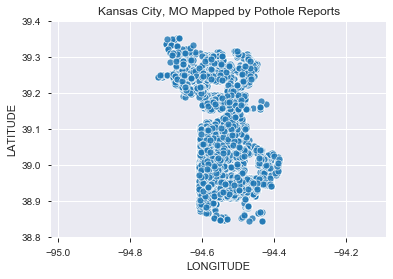

In [326]:
# Look at reports by latitude and longitude
import seaborn as sns
plt.axis('equal')
plt.title('Kansas City, MO Mapped by Pothole Reports')
sns.scatterplot(x=X_train['LONGITUDE'], 
                y=X_train['LATITUDE'], 
                alpha=.8);

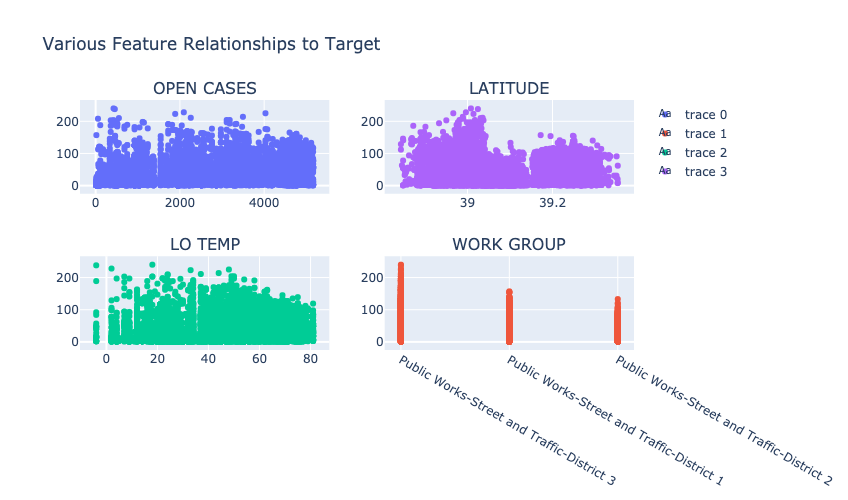

In [106]:
# Look for linear relationships with target
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("OPEN CASES", "LATITUDE", "LO TEMP", "WORK GROUP"))

fig.add_trace(go.Scatter(x=train_wrangled['OPEN CASES'],
                        y=train_wrangled['DAYS TO CLOSE'],
                        mode='markers+text'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_wrangled['WORK GROUP'],
                        y=train_wrangled['DAYS TO CLOSE'],
                        mode='markers+text'),
              row=2, col=2)

fig.add_trace(go.Scatter(x=train_wrangled['LO TEMP'],
                        y=train_wrangled['DAYS TO CLOSE'],
                        mode='markers+text'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=train_wrangled['LATITUDE'],
                        y=train_wrangled['DAYS TO CLOSE'],
                        mode='markers+text'),
              row=1, col=2)

fig.update_layout(height=500, width=700,
                  title_text="Various Feature Relationships to Target")

fig.show()

## Fit Linear Model

In [23]:
# Fit linear regression model
import category_encoders as ce
import statsmodels.api as sm 
from sklearn.metrics import r2_score

# Arrange data into X selected features matrix and y target vector
target = 'DAYS TO CLOSE'
features = ['OPEN CASES', 'WORK GROUP', 'LATITUDE', 'LONGITUDE', 'LO TEMP']
X_train_poisson = train_wrangled.loc[:, features]
y_train_poisson = train_wrangled[target]
X_test_poisson = test_wrangled.loc[:, features]
y_test_poisson = test_wrangled[target]

# Encode categorical data
encoder = ce.OneHotEncoder()
X_train_encoded_p = encoder.fit_transform(X_train_poisson)
X_test_encoded_p = encoder.transform(X_test_poisson)

# Fit model
poisson_model = sm.GLM(y_train_poisson, 
                       X_train_encoded_p, 
                       family=sm.families.Poisson()).fit()

y_pred_poisson = poisson_model.get_prediction(X_train_encoded_p).summary_frame()['mean']
print('Train R^2 Score for Poisson Regression', r2_score(y_train_poisson, y_pred_poisson))
mae = mean_absolute_error(y_train_poisson, y_pred_poisson)
print(f'Train MAE: {mae:.2f} days\n')

y_pred_poisson = poisson_model.get_prediction(X_test_encoded_p).summary_frame()['mean']
print('Test R^2 Score for Poisson Regression', r2_score(y_test_poisson, y_pred_poisson))
mae = mean_absolute_error(y_test_poisson, y_pred_poisson)
print(f'Test MAE: {mae:.2f} days')

Train R^2 Score for Poisson Regression 0.14151223883160435
Train MAE: 25.95 days

Test R^2 Score for Poisson Regression 0.11610549861877162
Test MAE: 25.72 days


## Fit Tree-Based Model

In [ ]:
# Arrange data into X features matrix and y target vector
target = 'DAYS TO CLOSE'
X_train = train_wrangled.drop(columns=target)
y_train = train_wrangled[target]
X_test = test_wrangled.drop(columns=target)
y_test = test_wrangled[target]

In [27]:
# Fit tree-based model

# imports for XGBoost model and hyperparameter tuning
import xgboost.sklearn as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Arrange data into X features matrix and y target vector
target = 'DAYS TO CLOSE'
X_train = train_wrangled.drop(columns=target)
y_train = train_wrangled[target]
X_test = test_wrangled.drop(columns=target)
y_test = test_wrangled[target]

# Encode categorical data
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

param_distributions = {
    'learning_rate': uniform(.1, .3),
    'max_depth': randint(3, 15),
    'gamma': uniform(0, 1),
    'lambda': randint(0, 5)
}

fit_params={"early_stopping_rounds":50, 
            "eval_metric" : "mae",
            "eval_set" : [[X_test_encoded, y_test]]}

model = xgb.XGBRegressor(objective='reg:squarederror')

cv = 5

searchXG = RandomizedSearchCV(model, 
                              param_distributions, 
                              n_iter=10, 
                              n_jobs=-1, 
                              return_train_score=True, 
                              scoring='neg_mean_absolute_error', 
                              random_state=7,
        cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X_train_encoded, y_train]))

searchXG.fit(X_train_encoded, y_train, **fit_params);

# Ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[0]	validation_0-mae:30.4109
Will train until validation_0-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:26.3951
[2]	validation_0-mae:23.8692
[3]	validation_0-mae:22.3248
[4]	validation_0-mae:21.297
[5]	validation_0-mae:20.7013
[6]	validation_0-mae:20.2635
[7]	validation_0-mae:19.9737
[8]	validation_0-mae:19.8283
[9]	validation_0-mae:19.6736
[10]	validation_0-mae:19.6144
[11]	validation_0-mae:19.6112
[12]	validation_0-mae:19.5251
[13]	validation_0-mae:19.5172
[14]	validation_0-mae:19.534
[15]	validation_0-mae:19.4912
[16]	validation_0-mae:19.4847
[17]	validation_0-mae:19.4807
[18]	validation_0-mae:19.452
[19]	validation_0-mae:19.4265
[20]	validation_0-mae:19.3868
[21]	validation_0-mae:19.2761
[22]	validation_0-mae:19.2701
[23]	validation_0-mae:19.2668
[24]	validation_0-mae:19.2625
[25]	validation_0-mae:19.2522
[26]	validation_0-mae:19.2439
[27]	validation_0-mae:19.2135
[28]	validation_0-mae:19.2062
[29]	validation_0-mae:19.1895
[30]	validation_0-mae:19.1633
[31]	validation_0-m

In [28]:
print('Best hyperparameters:', searchXG.best_params_)
print('Cross-validation MAE', (searchXG.best_score_ * -1))

Best hyperparameters: {'gamma': 0.7234651778309412, 'lambda': 4, 'learning_rate': 0.1924038295563218, 'max_depth': 10}
Cross-validation MAE 18.49092740844586


In [98]:
# Create pipeline with best hyperparameters
# and perform cross-validation 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    xgb.XGBRegressor(
        gamma=.72,
        reg_lambda=4,
        learning_rate=.19,
        max_depth=10,
        objective='reg:squarederror',
        early_stopping_rounds=50
    )
)

# Fit pipeline to train data
pipeline.fit(X_train, y_train)

# Find cross-validation scores
k=3
scores = cross_val_score(pipeline, 
                         X_train, 
                         y_train, 
                         cv=k, 
                         scoring='neg_mean_absolute_error'
                        )
print(f'MAE for {k} folds:', -scores)

# Print evaluation metrics for train data
y_pred = pipeline.predict(X_train)
# Clip predictions to avoid negative predictions
y_pred_positive = np.clip(y_pred, a_min=0, a_max=250)
print('\nTrain R^2 Score', r2_score(y_train, y_pred_positive))
mae = mean_absolute_error(y_train, y_pred_positive)
print(f'Train Mean Absolute Error: {mae:.2f} days\n')

# Print evaluation metrics for test data
y_pred = pipeline.predict(X_test)
# Clip predictions to avoid negative predictions
y_pred_positive = np.clip(y_pred, a_min=0, a_max=250)
print('Test R^2 Score', r2_score(y_test, y_pred_positive))
mae = mean_absolute_error(y_test, y_pred_positive)
print(f'Test Mean Absolute Error: {mae:.2f} days')

MAE for 3 folds: [18.90720282 18.93596383 18.94737257]

Train R^2 Score 0.9001062618639198
Train Mean Absolute Error: 7.34 days

Test R^2 Score 0.3774100828328829
Test Mean Absolute Error: 18.72 days


## Model Visualizations

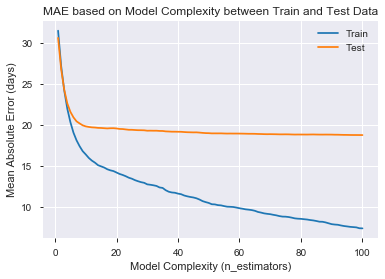

In [345]:
# Remove from pipeline in order to chart
# results of XGBoost Parameter tuning

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Set up XGB model
model = xgb.XGBRegressor(
            gamma=.72,
            reg_lambda=4,
            learning_rate=.19,
            max_depth=10,
            objective='reg:squarederror',
            early_stopping_rounds=50
)

# Define eval_set
eval_set = [(X_train_encoded, y_train),
           (X_test_encoded, y_test)]

# Fit model, with early stopping rounds
model.fit(X_train_encoded, y_train,
         eval_set=eval_set,
         eval_metric='mae',
         early_stopping_rounds=25,
         verbose=0)

import matplotlib.pyplot as plt
results = model.evals_result()
train_error = results['validation_0']['mae']
test_error = results['validation_1']['mae']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, test_error, label='Test')
plt.ylabel('Mean Absolute Error (days)')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('MAE based on Model Complexity between Train and Test Data')
plt.legend()
plt.show();

In [100]:
# Calculate permutation importances for y_train
import eli5
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(
    model,
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=7
)

# Show importances
permuter.fit(X_train_encoded, y_train);
feature_names = X_train_encoded.columns.tolist()
eli5.show_weights(
    permuter,
    top=30,
    feature_names=feature_names
)

In [101]:
# Calculate permutation importances for y_test
permuter = PermutationImportance(
    model,
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=7
)

permuter.fit(X_test_encoded, y_test)

# Look at permutation importances
feature_names = X_test_encoded.columns.tolist()
eli5.show_weights(
    permuter,
    top=30,
    feature_names=feature_names
)

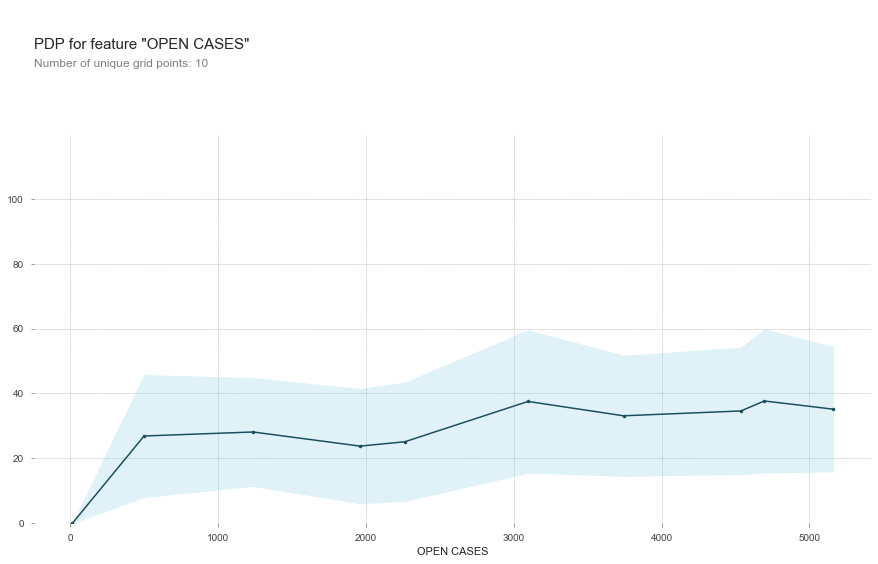

In [132]:
# Look at partial dependence plots for top features
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp

feature = 'OPEN CASES'

isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

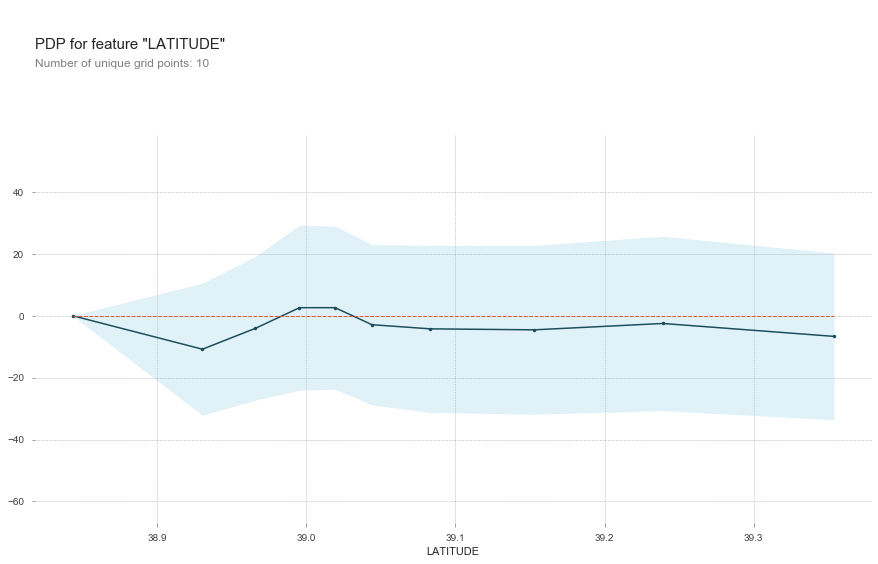

In [133]:
feature = 'LATITUDE'

isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

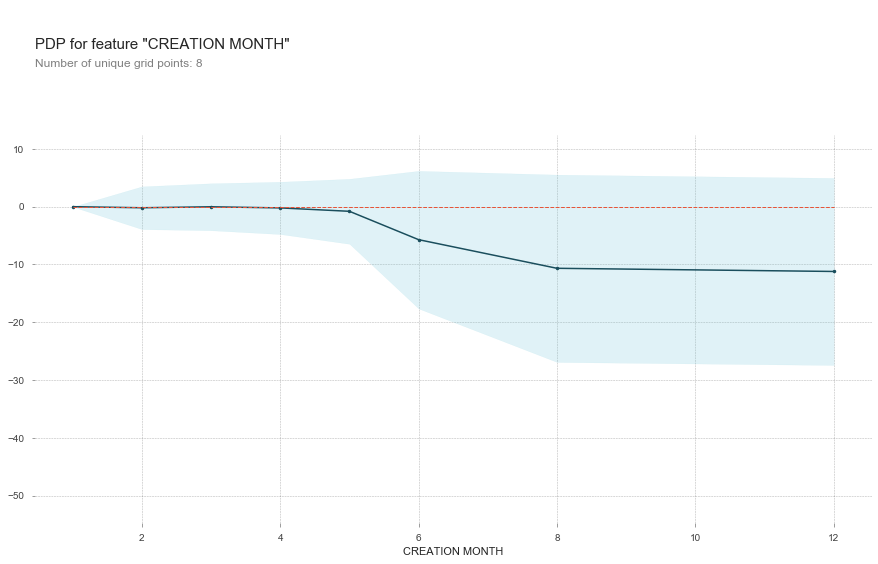

In [138]:
feature = 'CREATION MONTH'

isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

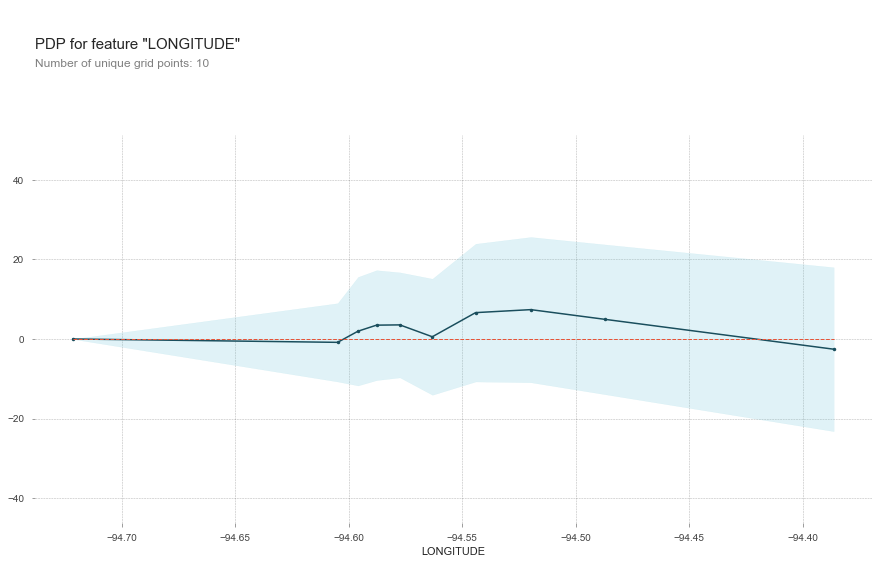

In [134]:
feature = 'LONGITUDE'

isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

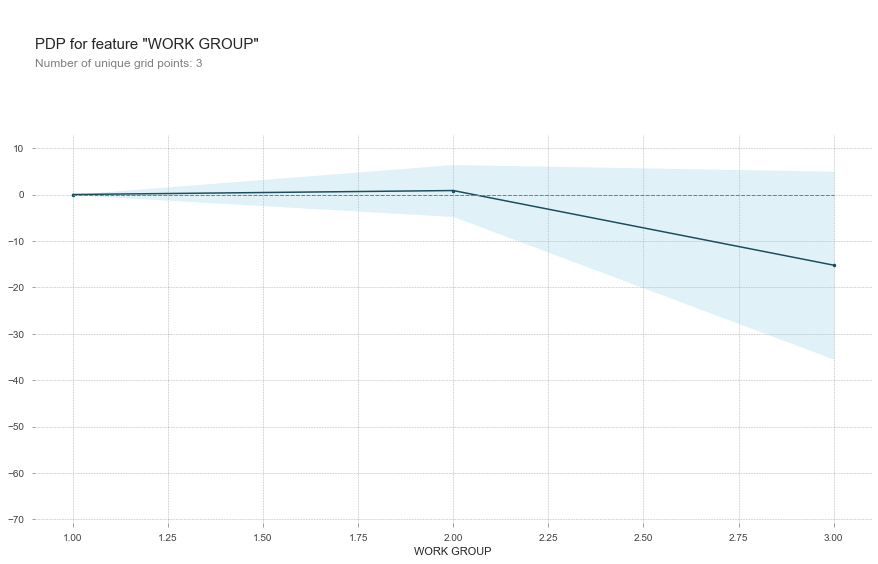

In [135]:
feature = 'WORK GROUP'

isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

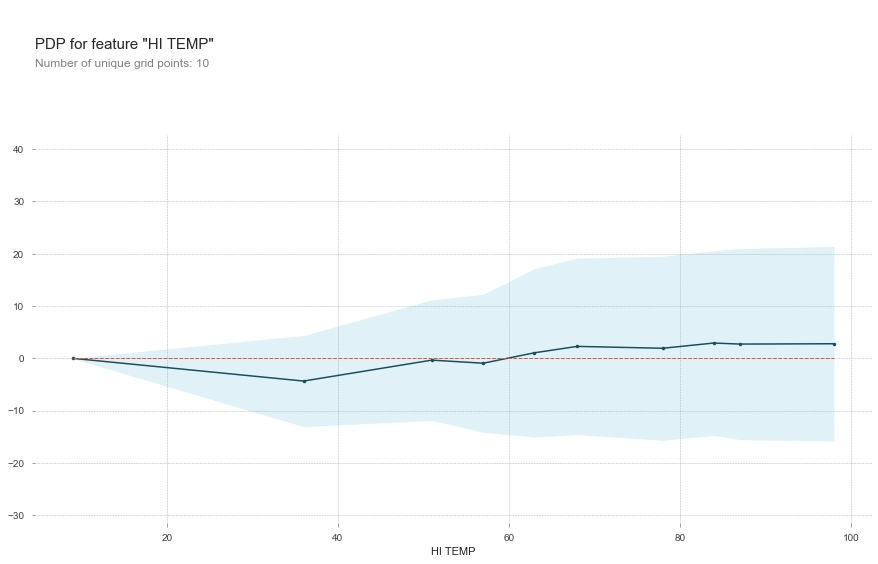

In [149]:
feature = 'HI TEMP'

isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [110]:
# Create shapley plot
import shap

# Create test row
row = X_train_encoded.iloc[[0]]
print(model.predict(row))

# Create force plot
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
)

[11.90422]


In [127]:
# Try different Shap force plot
row = X_train_encoded.iloc[[4000]]

shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
)

In [128]:
# Try different Shap force plot
row = X_train_encoded.iloc[[5000]]

shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
)

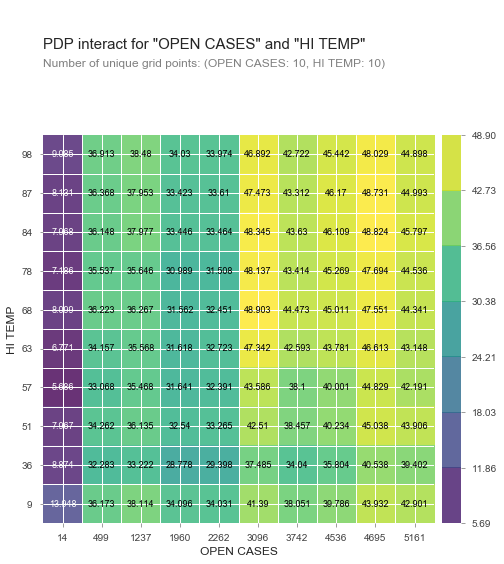

In [262]:
# Create pdp interact plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# Select features to look at
features = ['OPEN CASES', 'HI TEMP']

# Set up interaction
interaction = pdp_interact(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train_encoded.columns,
    features=features
)

# Create plot
pdp_interact_plot(interaction, plot_type='grid',
                 feature_names=features);

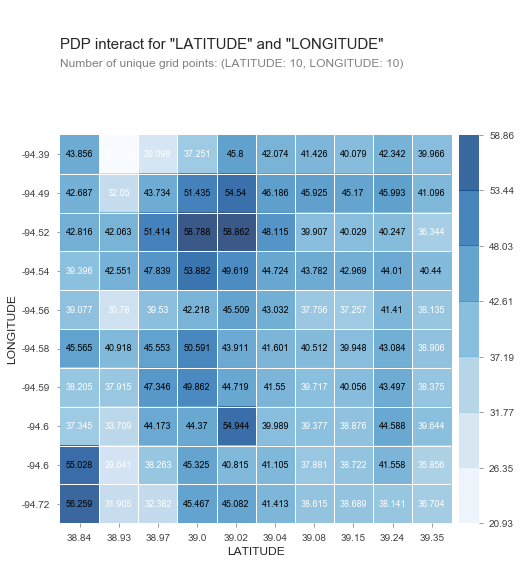

In [365]:
# Create pdp interact plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# Select features to look at
features = ['LATITUDE', 'LONGITUDE']

# Set up interaction
interaction = pdp_interact(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train_encoded.columns,
    features=features
)


# Create plot
fig, ax = pdp_interact_plot(interaction, 
                            plot_type='grid',
                            feature_names=features,
                            plot_params={'cmap':'Blues'})
#ax=fig.add_axes(frame_on=False)
#plt.fig(frameon=False)
# sns.set_style("whitegrid", {'axes.grid' : False})
# plt.grid('off')
fig.show();

## Simplify Model for Web App

In [256]:

def simple_wrangle(X):
    '''
    Wrangles previously wrangled data to make simpler for 
    use in web app
    '''
    
    # Avoid SettingWithCopyWarning
    X = X.copy()

    X['WEEK PRECIP'] = pd.qcut(X['WEEK PRECIP'], 
                              4,
                              labels=['none', 'low', 'medium', 'high'])

    X['HI TEMP'] = pd.cut(X['HI TEMP'], 
                             5,
                             labels=['below freezing', 'cold', 'mild', 'warm', 'hot'])
    
    return X

train_wrangled_simple = simple_wrangle(train_wrangled)
test_wrangled_simple = simple_wrangle(test_wrangled)

train_wrangled_simple.shape, test_wrangled_simple.shape

((11198, 16), (3802, 16))

In [283]:
# Create a simpler pipeline for purposes of web app

# Rearrange data into X features matrices
features = ['OPEN CASES', 
            'LATITUDE', 
            'LONGITUDE',
            'WEEK PRECIP', 
            'CREATION MONTH', 
            'HI TEMP']
X_train_simple = train_wrangled_simple.loc[:, features]
X_test_simple = test_wrangled_simple.loc[:, features]

# Set up pipeline
simple_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    xgb.XGBRegressor(
        gamma=.72,
        reg_lambda=4,
        learning_rate=.19,
        max_depth=10,
        objective='reg:squarederror',
        early_stopping_rounds=50
    )
)

# Fit pipeline to train data
simple_pipeline.fit(X_train_simple, y_train)

# Print evaluation metrics for simple model train data
y_pred_simple = simple_pipeline.predict(X_train_simple)
# Clip predictions to avoid negative predictions
y_pred_positive = np.clip(y_pred_simple, a_min=0, a_max=250)
print('\nTrain R^2 Score', r2_score(y_train, y_pred_positive))
mae = mean_absolute_error(y_train, y_pred_positive)
print(f'Train Mean Absolute Error: {mae:.2f} days\n')

# Print evaluation metrics for simple modeltest data
y_pred_simple = simple_pipeline.predict(X_test_simple)
# Clip predictions to avoid negative predictions
y_pred_positive = np.clip(y_pred_simple, a_min=0, a_max=250)
print('Test R^2 Score', r2_score(y_test, y_pred_positive))
mae = mean_absolute_error(y_test, y_pred_positive)
print(f'Test Mean Absolute Error: {mae:.2f} days')


Train R^2 Score 0.8482171204282805
Train Mean Absolute Error: 9.28 days

Test R^2 Score 0.36646274566787407
Test Mean Absolute Error: 19.17 days


In [278]:
# Retrieve version types to install in pipenv shell
import joblib
import sklearn
import category_encoders as ce
import xgboost
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')

joblib==0.13.2
scikit-learn==0.21.3
category_encoders==2.1.0
xgboost==0.90


In [284]:
# Pickle the model & dump locally
from joblib import dump
dump(simple_pipeline, 'pipeline.joblib', compress=True)

['pipeline.joblib']